In [173]:
#In this file, I will finish preprocessing by normalizing the columns in the dataframe
#and then go on to visualize the data then build regression models to predict the salary of an MLB player
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/2019_stats_clean.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
#Drop the only two categorical features in the dataframe: player name and team id
stats.drop(['name','teamID'], axis = 1, inplace = True)

In [175]:
stats.head()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,position_3B,position_C,position_DH,position_OF,position_SS,throws_L,throws_R,bats_B,bats_L,bats_R
0,32,159.0,693.0,634.0,85.0,180.0,38.0,1.0,33.0,123.0,...,0,0,0,0,0,0,1,0,0,1
1,23,152.0,584.0,531.0,69.0,135.0,25.0,1.0,20.0,52.0,...,0,0,0,0,1,0,1,0,0,1
2,30,111.0,333.0,310.0,42.0,70.0,14.0,0.0,20.0,56.0,...,0,0,0,0,0,0,1,0,1,0
3,29,83.0,234.0,202.0,34.0,55.0,8.0,3.0,5.0,22.0,...,1,0,0,0,0,0,1,1,0,0
4,29,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,82.0,...,0,0,0,0,1,0,1,0,0,1


In [176]:
#Need to normalize all features besides those that are already one hot encoded (those before the last 12).
#We will implement a min-max normalization technique below 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
normalized = scale.fit_transform(stats)
print(normalized)

[[0.6        0.98064516 0.92692828 ... 0.         0.         1.        ]
 [0.15       0.93548387 0.77943166 ... 0.         0.         1.        ]
 [0.5        0.67096774 0.43978349 ... 0.         1.         0.        ]
 ...
 [0.7        0.29032258 0.24627876 ... 0.         0.         1.        ]
 [0.9        0.25806452 0.22733424 ... 1.         0.         0.        ]
 [0.4        0.53548387 0.38024357 ... 0.         0.         1.        ]]


In [177]:
#Convert from numpy array with min-max normalized values to a Pandas Dataframe
stats_normalized = pd.DataFrame(normalized, columns = stats.columns)
stats_normalized.head()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,position_3B,position_C,position_DH,position_OF,position_SS,throws_L,throws_R,bats_B,bats_L,bats_R
0,0.60,0.980645,0.926928,0.930267,0.629630,0.873786,0.655172,0.1,0.622642,0.976190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.15,0.935484,0.779432,0.777448,0.511111,0.655340,0.431034,0.1,0.377358,0.412698,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.50,0.670968,0.439783,0.449555,0.311111,0.339806,0.241379,0.0,0.377358,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.45,0.490323,0.305819,0.289318,0.251852,0.266990,0.137931,0.3,0.094340,0.174603,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.45,0.974194,0.834912,0.814540,0.585185,0.684466,0.568966,0.6,0.358491,0.650794,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [178]:
stats_ = stats_normalized.loc[(stats_normalized['Rookie contract'] == 0)]

Text(0.5, 1.0, 'Salary vs. WAR')

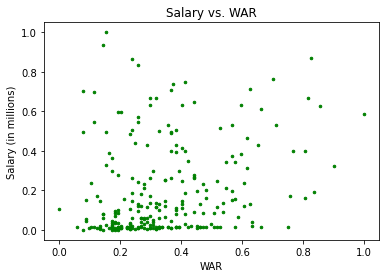

In [179]:
#Visualize what features contribute to salary for position players in the MLB.
import matplotlib.pyplot as plt
x = stats_['WAR']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('WAR')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. WAR')

Text(0.5, 1.0, 'Salary vs. OPS')

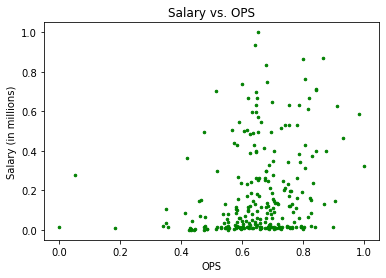

In [180]:
x = stats_['ops']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('OPS')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OPS')

Text(0.5, 1.0, 'Salary vs. Home Runs')

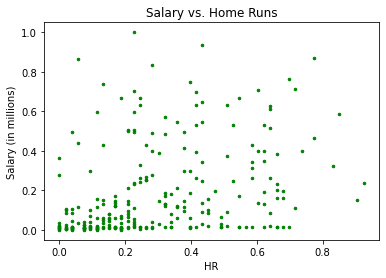

In [181]:
x = stats_['HR']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('HR')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Home Runs')

Text(0.5, 1.0, 'Salary vs. RBI')

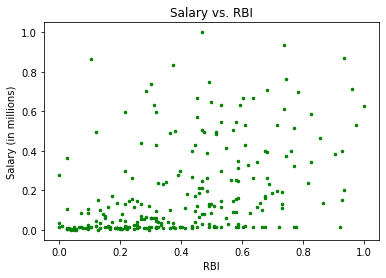

In [182]:
x = stats_['RBI']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('RBI')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. RBI')

Text(0.5, 1.0, 'Salary vs. avg')

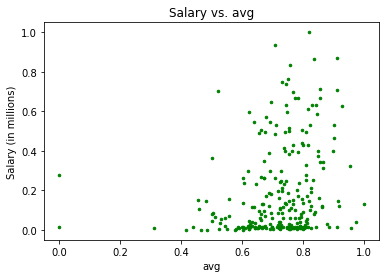

In [183]:
x = stats_['avg']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('avg')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. avg')

Text(0.5, 1.0, 'Salary vs. hits')

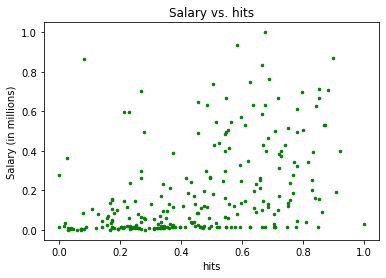

In [184]:
x = stats_['H']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('hits')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. hits')

Text(0.5, 1.0, 'Salary vs. games')

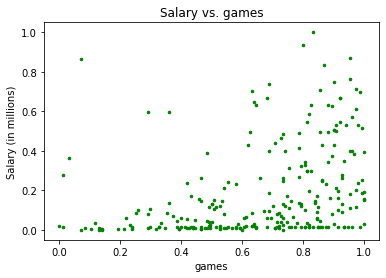

In [185]:
x = stats_['G']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('games')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. games')

Text(0.5, 1.0, 'Salary vs. GURU')

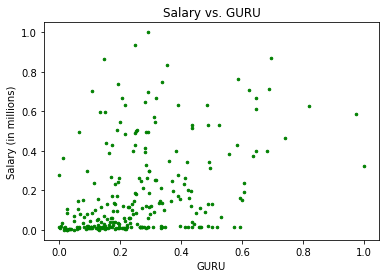

In [186]:
x = stats_['GURU']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('GURU')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. GURU')

Text(0.5, 1.0, 'Salary vs. PRO')

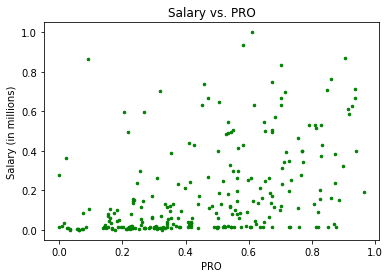

In [187]:
x = stats_['PRO']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('PRO')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. PRO')

Text(0.5, 1.0, 'Salary vs. OBP')

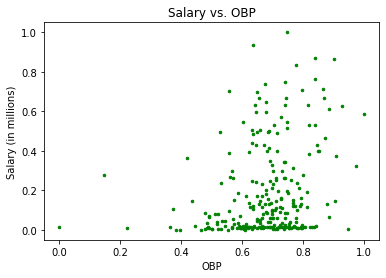

In [188]:
x = stats_['obp']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('OBP')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OBP')

Text(0.5, 1.0, 'Salary vs. SLG%')

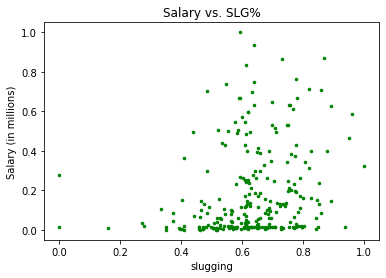

In [189]:
x = stats_['slg']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('slugging')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. SLG%')

Text(0.5, 1.0, 'Salary vs. Stolen Bases')

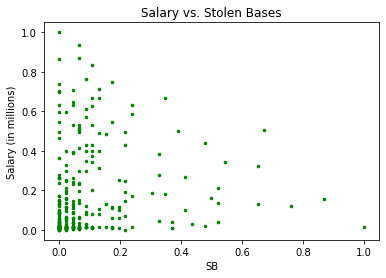

In [190]:
x = stats_['SB']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('SB')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Stolen Bases')

Text(0.5, 1.0, 'Salary vs. OPS')

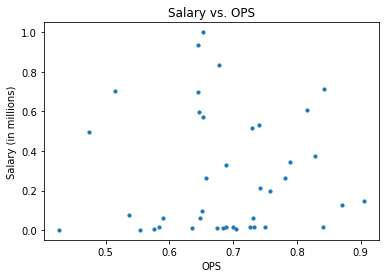

In [191]:
#We will start by doing position wide visualizations to see what features contribute to salary
import matplotlib.pyplot as plt
first_base = stats_normalized.loc[(stats_normalized['position_1B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

x = first_base['ops']
y = first_base['salary']
plt.scatter(x,y,s=10)
plt.xlabel('OPS')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OPS')

In [192]:
print(stats.columns)

Index(['age', 'G', 'tap', 'AB', 'R', 'H', 'db', 'tr', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'SO', 'IBB', 'hbp', 'SH', 'SF', 'GIDP', 'avg', 'obp', 'slg',
       'woba', 'PRO', 'GURU', 'salary', 'ops', 'WAR', 'count',
       'Rookie contract', 'position_1B', 'position_2B', 'position_3B',
       'position_C', 'position_DH', 'position_OF', 'position_SS', 'throws_L',
       'throws_R', 'bats_B', 'bats_L', 'bats_R'],
      dtype='object')


Text(0.5, 1.0, 'Salary vs. Home Runs')

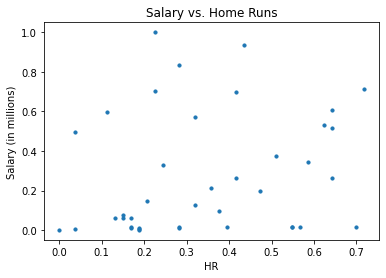

In [193]:
x = first_base['HR']
y = first_base['salary']
plt.scatter(x,y,s=10)
plt.xlabel('HR')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Home Runs')

Text(0.5, 1.0, 'Salary vs. Wins Above Replacement')

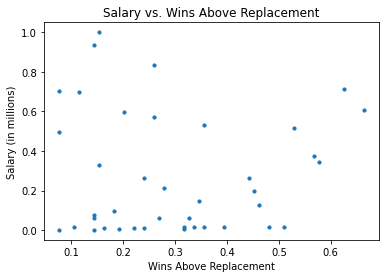

In [194]:

x = first_base['WAR']
y = first_base['salary']
plt.scatter(x,y,s=10)
plt.xlabel('Wins Above Replacement')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Wins Above Replacement')

Text(0.5, 1.0, 'Salary vs. OBP')

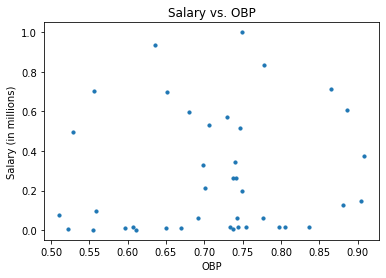

In [195]:
x = first_base['obp']
y = first_base['salary']
plt.scatter(x,y,s=10)
plt.xlabel('OBP')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OBP')